# Decision Trees Exercises

## Introduction

We will be using the wine quality data set for these exercises. This data set contains various chemical properties of wine, such as acidity, sugar, pH, and alcohol. It also contains a quality metric (3-9, with highest being better) and a color (red or white). The name of the file is `Wine_Quality_Data.csv`.

### Prerequisites

Install pydotplus and seaborn in your own virtual environment

!pip install pydotplus

!pip install seaborn

In [1]:
from __future__ import print_function
import os
data_path = ['data']

## Question 1

* Import the data and examine the features.
* We will be using all of them to predict `color` (white or red), but the colors feature will need to be integer encoded.

In [2]:
import numpy as np
import pandas as pd

file_path = os.sep.join(data_path + ['Wine_Quality_Data.csv'])
data = pd.read_csv(file_path, sep=',',header=0)

In [3]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [4]:
data.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
color                    object
dtype: object

Convert the color feature to an integer. This is a quick way to do it using Pandas.

In [5]:
data['color'] = data.color.replace(['white','red'],[0,1]).astype(np.int)

In [6]:
data.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Question 2

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by wine quality. If possible, preserve the indices of the split for question 5 below.
* Check the percent composition of each quality level for both the train and test data sets.

In [7]:
# All data columns except for color
feature_cols = [x for x in data.columns if x not in 'color']

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit
strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=1000,random_state=45)

train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols],data['color']))

# Create the data sets
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'color']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'color']

Now check the percent composition of each quality level in the train and test data sets. The data set is mostly white wine, as can be seen below.

In [11]:
y_train.value_counts(normalize=True).sort_index()

0    0.753866
1    0.246134
Name: color, dtype: float64

In [12]:
y_test.value_counts(normalize=True).sort_index()

0    0.754
1    0.246
Name: color, dtype: float64

In [13]:
X_train.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
1264,8.5,0.37,0.32,1.80,0.066,26.0,51.0,0.99456,3.38,0.72,11.8,6
5552,8.4,0.22,0.30,1.30,0.038,45.0,122.0,0.99178,3.13,0.54,10.8,7
720,8.4,0.56,0.04,2.00,0.082,10.0,22.0,0.99760,3.22,0.44,9.6,5
3287,6.7,0.25,0.26,1.55,0.041,118.5,216.0,0.99490,3.55,0.63,9.4,3
3379,8.4,0.17,0.31,5.40,0.052,47.0,150.0,0.99530,3.24,0.38,9.8,5


## Question 3

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test data sets. What do you think is going on here based on the differences in prediction error?

In [16]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier().fit(X_train, y_train)

The number of nodes and the maximum actual depth.

In [17]:
dt.tree_.node_count, dt.tree_.max_depth

(139, 18)

A function to return error metrics.

In [20]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy': accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true,y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1':f1_score(y_true, y_pred)},
                    name=label)

The decision tree predicts a little better on the training data than the test data, which is consistent with (mild)  overfitting. Also notice the perfect recall score for the training data. In many instances, this prediction difference is even greater than that seen here. 

In [21]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

,train,test
accuracy,0.999636,0.975000
precision,0.999261,0.947368
recall,0.999261,0.951220
f1,0.999261,0.949290


## Question 4

* Using grid search with cross validation, find a decision tree that performs well on the test data set. Use a different variable name for this decision tree model than in question 3 so that both can be used in question 6.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 3.

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=42),
                  param_grid=param_grid,
                  scoring='accuracy',
                  n_jobs=-1)

GR = GR.fit(X_train, y_train)

The number of nodes and the maximum depth of the tree.

In [23]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(91, 7)

These test errors are a little better than the previous ones. So it would seem the previous example overfit the data, but only slightly so.

In [24]:
y_train_pred_gr = GR.predict(X_train)
y_test_pred_gr = GR.predict(X_test)

train_test_gr_error = pd.concat([measure_error(y_train, y_train_pred_gr, 'train'),
                                 measure_error(y_test, y_test_pred_gr, 'test')],
                                axis=1)

In [25]:
train_test_gr_error

,train,test
accuracy,0.997089,0.977000
precision,0.997766,0.974468
recall,0.990392,0.930894
f1,0.994065,0.952183


## Question 5

* Re-split the data into `X` and `y` parts, this time with `residual_sugar` being the predicted (`y`) data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 2, they can be used again to split the data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted residual sugar.

In [26]:
feature_cols = [x for x in data.columns if x != 'residual_sugar']

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'residual_sugar']

X_test = data.loc[test_idx, feature_cols]
y_test = data.loc[test_idx, 'residual_sugar']

In [28]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor().fit(X_train, y_train)

param_grid = {'max_depth': range(1, dr.tree_.max_depth+1,2),
              'max_features': range(1, len(dr.feature_importances_)+1)}

GR_sugar = GridSearchCV(DecisionTreeRegressor(random_state=45), 
                  param_grid=param_grid,
                  scoring='neg_mean_squared_error',
                  n_jobs=-1)
GR_sugar = GR_sugar.fit(X_train, y_train)

The number of nodes and the maximum depth of the tree. This tree has lots of nodes, which is not so surprising given the continuous data.

In [29]:
GR_sugar.best_estimator_.tree_.node_count, GR_sugar.best_estimator_.tree_.max_depth

(7659, 25)

The error on train and test data sets. Since this is continuous, we will use mean squared error.

In [30]:
from sklearn.metrics import mean_squared_error

y_train_sugar_pred = GR_sugar.predict(X_train)
y_test_sugar_pred = GR_sugar.predict(X_test)

train_test_gr_sugar_error = pd.Series({'train': mean_squared_error(y_train,y_train_sugar_pred),
                                       'test': mean_squared_error(y_test, y_test_sugar_pred)},
                                      name='mse').to_frame().T
train_test_gr_sugar_error

,train,test
mse,0.000156,2.997738


A plot of actual vs predicted residual sugar.

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')
sns.set_palette('dark')

% matplotlib inline

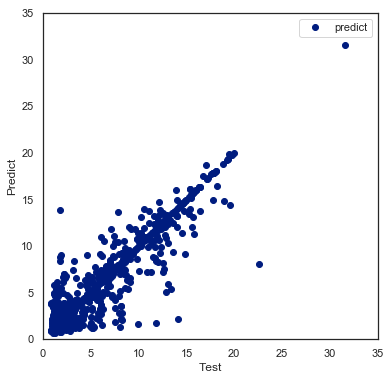

In [37]:
fig = plt.figure(figsize=(6,6))
ax = plt.axes()

ph_test_predict = pd.DataFrame({'test':y_test.values,
                                'predict': y_test_sugar_pred}).set_index('test').sort_index()

ph_test_predict.plot(marker='o', ls='', ax=ax)
ax.set(xlabel='Test', ylabel='Predict', xlim=(0,35), ylim=(0,35));

## Question 6 *(Optional)*

This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 3, where wine color was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 4, where wine color was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 5 will likely have too many nodes to visualize.

In [5]:
from io import StringIO
from IPython.display import Image, Display

from sklearn.tree import export_graphviz

ImportError: cannot import name 'Display' from 'IPython.display' (C:\Users\Bomera Moses\Anaconda3\lib\site-packages\IPython\display.py)

The tree from question 3.

In [ ]:
if pydotplus_installed:
    
    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(dt, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    print(graph)
    # View the tree image
    filename = 'wine_tree.png'
    graph.write_png(filename)
    img = Image(filename=filename)
    display(img)
    
else:
    print('This cell not executed because PyDotPlus could not be loaded.')

The tree fit with cross validation from question 4. This tree is much shallower than the previous one.

In [ ]:
if pydotplus_installed:
    
    # Create an output destination for the file
    dot_data = StringIO()

    export_graphviz(GR.best_estimator_, out_file=dot_data, filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

    # View the tree image
    filename = 'wine_tree_prune.png'
    graph.write_png(filename)
    img = Image(filename=filename) 
    display(img)
    
else:
    print('This cell not executed because PyDotPlus could not be loaded.')

## Question 7
* Import the iris data and examine the features.
* We will be using all of them to predict species, but the species feature will need to be integer encoded.

In [8]:
file_path = os.sep.join(data_path+['Iris_Data.csv'])
data = pd.read_csv(file_path, sep=',', header=0)

data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [9]:
data.species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: species, dtype: int64

Convert the species feature to an integer. This is a quick way to do it using Pandas.

In [10]:
data['species'] = data.species.replace(['Iris-virginica','Iris-setosa','Iris-versicolor'],[0,1,2]).astype(np.int)

In [11]:
data.sample(100)

,sepal_length,sepal_width,petal_length,petal_width,species
98,5.1,2.5,3.0,1.1,2
111,6.4,2.7,5.3,1.9,0
84,5.4,3.0,4.5,1.5,2
2,4.7,3.2,1.3,0.2,1
30,4.8,3.1,1.6,0.2,1
89,5.5,2.5,4.0,1.3,2
15,5.7,4.4,1.5,0.4,1
78,6.0,2.9,4.5,1.5,2
95,5.7,3.0,4.2,1.2,2
129,7.2,3.0,5.8,1.6,0


## Question 8

* Use `StratifiedShuffleSplit` to split data into train and test sets that are stratified by species. If possible, preserve the indices of the split for question 11 below.
* Check the percent composition of each species level for both the train and test data sets.

In [25]:
# All data columns except for species
from sklearn.model_selection import StratifiedShuffleSplit

feature_cols = [x for x in data.columns if x != 'species']

strat_shuff_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=45)
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols],data['species']))

X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'species']

X_test = data.loc[test_idx, feature_cols ]
y_test = data.loc[test_idx, 'species']


In [26]:
X_test.shape, y_test.shape

((45, 4), (45,))

Now check the percent composition of each species in the train and test iris_data sets. The iris_data set is equally distributed, as can be seen below.

In [27]:
y_test.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: species, dtype: float64

In [28]:
y_train.value_counts(normalize=True)

2    0.333333
1    0.333333
0    0.333333
Name: species, dtype: float64

## Question 9

* Fit a decision tree classifier with no set limits on maximum depth, features, or leaves.
* Determine how many nodes are present and what the depth of this (very large) tree is.
* Using this tree, measure the prediction error in the train and test iris_data sets. What do you think is going on here based on the differences in prediction error?

In [29]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier().fit(X_train, y_train)

The number of nodes and the maximum actual depth.

In [30]:
DTC.tree_.node_count, DTC.tree_.max_depth

(9, 4)

A function to return error metrics.
#### HINT: This is not a binary classification problem, IRIS data set has 3 classes in target column. Check on score functions

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision':precision_score(y_true, y_pred, average='macro'),
                      'recall':recall_score(y_true, y_pred, average='macro'),
                      'f1_score':f1_score(y_true, y_pred, average='macro')}, name=label)

The decision tree predicts a little better on the training iris_data than the test iris_data, which is consistent with (mild)  overfitting. Also notice the perfect recall score for the training iris_data. In many instances, this prediction difference is even greater than that seen here. 

In [32]:
y_train_pred = DTC.predict(X_train)
y_test_pred = DTC.predict(X_test)

error_metrics = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                          measure_error(y_test, y_test_pred, 'test')], axis=1)
error_metrics

,train,test
accuracy,1.0,0.955556
precision,1.0,0.960784
recall,1.0,0.955556
f1_score,1.0,0.955357


In [33]:
data[feature_cols].iloc[147:148,]

,sepal_length,sepal_width,petal_length,petal_width
147,6.5,3.0,5.2,2.0


In [34]:
pred = DTC.predict(data[feature_cols].iloc[29:30,])
pred

array([1])



## Question 10

* Using grid search with cross validation, find a decision tree that performs well on the test iris_data set. Use a different variable name for this decision tree model than in question 9 so that both can be used in question 12.
* Determine the number of nodes and the depth of this tree.
* Measure the errors on the training and test sets as before and compare them to those from the tree in question 9.

In [35]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, DTC.tree_.max_depth+1,2),
              'max_features': range(1,len(DTC.feature_importances_)+1)}

GR = GridSearchCV(DecisionTreeClassifier(random_state=45),
                 param_grid=param_grid,
                 scoring='accuracy',
                 n_jobs=-1)

GR = GR.fit(X_train, y_train)

C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\Bomera Moses\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


The number of nodes and the maximum depth of the tree.

In [36]:
GR.best_estimator_.tree_.node_count, GR.best_estimator_.tree_.max_depth

(7, 3)

These test errors are a little better than the previous ones. So it would seem the previous example overfit the iris_data, but only slightly so.

In [37]:
y_train_gr_pred = GR.predict(X_train)
y_test_gr_pred = GR.predict(X_test)

error_metrics = pd.concat([measure_error(y_train, y_train_gr_pred, 'train'),
                           measure_error(y_test, y_test_gr_pred, 'test')], axis=1)

error_metrics

,train,test
accuracy,0.990476,0.955556
precision,0.990741,0.960784
recall,0.990476,0.955556
f1_score,0.990474,0.955357


# Question 11

* Re-split the iris_data into `X` and `y` parts, this time with `species` being the predicted (`y`) iris_data. *Note:* if the indices were preserved from the `StratifiedShuffleSplit` output in question 8, they can be used again to split the iris_data.
* Using grid search with cross validation, find a decision tree **regression** model that performs well on the test iris_data set.
* Measure the errors on the training and test sets using mean squared error.
* Make a plot of actual *vs* predicted species.

The number of nodes and the maximum depth of the tree. This tree has lots of nodes, which is not so surprising given the continuous iris_data.

The error on train and test iris_data sets. Since this is continuous, we will use mean squared error.

A plot of actual vs predicted species.

## Question 12 *(Optional)*

This question is optional as it requires an additional command line program (GraphViz) and Python library (PyDotPlus). GraphViz can be installed with a package manager on Linux and Mac. For PyDotPlus, either `pip` or `conda` (`conda install -c conda-forge pydotplus`) can be used to install the library.

Once these programs are installed:

* Create a visualization of the decision tree from question 9, where wine species was predicted and the number of features and/or splits are not limited.
* Create a visualization of the decision tree from question 10, where wine species was predicted but a grid search was used to find the optimal depth and number of features.

The decision tree from question 11 will likely have too many nodes to visualize.

The tree from question 9.

The tree fit with cross validation from question 10. This tree is much shallower than the previous one.